In [71]:
%matplotlib inline
import nltk
import numpy as np
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil.valecha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil.valecha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahil.valecha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sahil.valecha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sahil.valecha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
tweets = pd.read_csv('narendramodi_tweets.csv')
tweets.shape

(3220, 14)

In [73]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


## Step 1: Text Cleaning & Regular Expressions

In [74]:
docs = tweets['text'].str.lower() #step 1.1

docs = docs.str.replace(r'[^a-z #@]','') #step 1.2: regular expressions
print(docs)

0       the presidents address wonderfully encapsulate...
1       rashtrapati jis address to both houses of parl...
2       rt @pmoindia empowering the marginalised https...
3       rt @pmoindia commitment to welfare of farmers ...
4       rt @pmoindia improving the quality of life for...
5       rt @pmoindia financial inclusion for poverty a...
6       rt @rashtrapatibhvn the fourdecade old demand ...
7       rt @rashtrapatibhvn my government has taken bo...
8       rt @rashtrapatibhvn under its proactive act ea...
9       rt @rashtrapatibhvn through standup india init...
10      rt @rashtrapatibhvn pradhan mantri fasal bima ...
11      rt @rashtrapatibhvn my government has taken va...
12      rt @rashtrapatibhvn my government is committed...
13      rt @rashtrapatibhvn my government has taken ma...
14      rt @rashtrapatibhvn at the core of all my govt...
15      rt @rashtrapatibhvn janashakti has transformed...
16      rt @rashtrapatibhvn resilience amp forbearance...
17      rt @ra

## Step 1a: Removing Stop Words and Corpus Building

In [75]:
common_stop_words = nltk.corpus.stopwords.words('english') #step 1.3: removing stop words - we need to check for stopwords 
#list as per analysis requirement - words like 'I', 'we', 'not', 'nor' might be important for sentiment analysis

custom_stop_words = ['', 'amp', 'rt','ji'] #this will depend upon non-required words we get in the first place with common stop
#words

total_stop_words = np.hstack([common_stop_words, custom_stop_words])

print(len(total_stop_words))

183


In [76]:
# we are using gensim package - it's working is different from scikit learn and nltk

corpus = []
tokens = []

from nltk.stem import PorterStemmer # this step is used to identify root word

stemmer = PorterStemmer() #Porterstemmer is the class and stemmer is the object created by us 

for doc in docs:
    # print(nltk.word_tokenize(doc))
    #or
    words = doc.split(' ') #preferred way
    print(words)
    print('---------------------')
    words_clean = [stemmer.stem(word) for word in words if word not in total_stop_words]
    print(words_clean)
    
    corpus.append(words_clean) #every tweet is considered as a different doc. collection of docs is a corpus
    #append stores cleaned words from each tweet as a list.
    
    tokens.extend(words_clean)
    #corpus: list of lists - cleaned words from each tweet in form of a list
    #token: list of words from corpus in form of individual words (duplicates will be there)

['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
---------------------
['presid', 'address', 'wonder', 'encapsul', 'india', 'strength', 'aspir', 'potenti', 'effort', 'toward', '#transformingindia']
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
---------------------
['rashtrapati', 'ji', 'address', 'hous', 'parliament', 'indepth', 'extens', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
['rt', '@pmoindia', 'empowering', 'the', 'marginalised', 'httpstcowwsqgwdk']
---------------------
['@pmoindia', 'empow', 'marginalis', 'httpstcowwsqgwdk']
['rt', '@pmoindia', 'commitment', 'to', 'welfare', 'of', 'farmers', 'httpstcopaafrfmrc']
---------------------
['@pmoindia', 'commit', 'welfar', 'farmer', 'httpstcopaafrfmrc']
['rt', '@pmoindia', 'impro

---------------------
['great', 'enthusiasm', '#digidhanmela', 'gurugram', 'cm', '@mlkhattar', 'minist', 'other', 'lent', 'support', 'increas', 'digit', 'transact']
['the', 'successful', 'test', 'firing', 'of', 'agni', 'v', 'is', 'the', 'result', 'of', 'the', 'hardwork', 'of', 'drdo', 'amp', 'its', 'scientists', 'i', 'congratulate', 'them', '@drdoindia']
---------------------
['success', 'test', 'fire', 'agni', 'v', 'result', 'hardwork', 'drdo', 'scientist', 'congratul', '@drdoindia']
['successful', 'test', 'firing', 'of', 'agni', 'v', 'makes', 'every', 'indian', 'very', 'proud', 'it', 'will', 'add', 'tremendous', 'strength', 'to', 'our', 'strategic', 'defence']
---------------------
['success', 'test', 'fire', 'agni', 'v', 'make', 'everi', 'indian', 'proud', 'add', 'tremend', 'strength', 'strateg', 'defenc']
['talked', 'at', 'length', 'about', 'lucky', 'grahak', 'yojana', 'amp', 'digidhan', 'vyapar', 'yojana', 'during', 'todays#mannkibaat', 'httpstcokasfxdbuw']
---------------------
[

['greet', '@bsfindia', 'personnel', 'rais', 'day', 'bsf', 'exemplari', 'legaci', 'courag', 'vital', 'role', 'keep', 'border', 'safe']
['statehood', 'day', 'wishes', 'to', 'people', 'of', 'nagaland', 'a', 'state', 'known', 'for', 'scenic', 'beauty', 'amp', 'talented', 'citizens', 'who', 'will', 'take', 'it', 'to', 'new', 'heights', 'of', 'progress']
---------------------
['statehood', 'day', 'wish', 'peopl', 'nagaland', 'state', 'known', 'scenic', 'beauti', 'talent', 'citizen', 'take', 'new', 'height', 'progress']
['', '', '', 'httpstcosgussyiyg']
---------------------
['httpstcosgussyiyg']
['some', 'catchy', 'radio', 'ads', 'that', 'you', 'must', 'hear', 'and', 'urge', 'others', 'to', 'hearon', 'increased', 'cashless', 'transactions', 'httpstconoldywphv']
---------------------
['catchi', 'radio', 'ad', 'must', 'hear', 'urg', 'other', 'hearon', 'increas', 'cashless', 'transact', 'httpstconoldywphv']
['was', 'delighted', 'to', 'read', 'about', 'mumbais', 'famous', 'dabbawalas', 'becoming

['sardar', 'patel', 'unified', 'india', 'this', 'unity', 'in', 'diversity', 'is', 'our', 'strength', 'highlighted', 'ways', 'our', 'states', 'can', 'deepen', 'collaboration', 'amp', 'deepen', 'bonds']
---------------------
['sardar', 'patel', 'unifi', 'india', 'uniti', 'divers', 'strength', 'highlight', 'way', 'state', 'deepen', 'collabor', 'deepen', 'bond']
['talked', 'about', 'various', 'facets', 'of', 'sardar', 'patels', 'personality', 'focus', 'on', 'women', 'empowerment', 'his', 'devotion', 'to', 'gandhi', 'ji', 'amp', 'administrative', 'skills']
---------------------
['talk', 'variou', 'facet', 'sardar', 'patel', 'person', 'focu', 'women', 'empower', 'devot', 'gandhi', 'administr', 'skill']
['some', 'pictures', 'from', 'my', 'visit', 'to', 'an', 'exhibition', 'on', 'sardar', 'patel', 'and', 'his', 'life', 'the', 'exhibition', 'was', 'very', 'informative', 'httpstcootsimg']
---------------------
['pictur', 'visit', 'exhibit', 'sardar', 'patel', 'life', 'exhibit', 'inform', 'httpst

---------------------
['honour', 'host', 'daw', 'aung', 'san', 'suu', 'kyi', 'bricsbimstec', 'outreach', 'summit', 'wish', 'wonder', 'visit', 'india', '@bric']
['brics', 'business', 'council', 'has', 'a', 'key', 'role', 'in', 'strengthening', 'trade', 'amp', 'business', 'opportunities', 'building', 'investment', 'linkages', 'amp', 'promoting', 'innovation']
---------------------
['bric', 'busi', 'council', 'key', 'role', 'strengthen', 'trade', 'busi', 'opportun', 'build', 'invest', 'linkag', 'promot', 'innov']
['highlighted', 'reforms', 'undertaken', 'by', 'india', 'in', 'last', '', 'years', 'to', 'make', 'business', 'easier', 'amp', 'make', 'india', 'one', 'of', 'the', 'most', 'open', 'economies', 'in', 'the', 'world']
---------------------
['highlight', 'reform', 'undertaken', 'india', 'last', 'year', 'make', 'busi', 'easier', 'make', 'india', 'one', 'open', 'economi', 'world']
['spoke', 'on', 'the', 'rich', 'potential', 'of', 'economic', 'cooperation', 'between', 'brics', 'nations',

['highlight', 'central', 'govern', 'usher', 'paradigm', 'shift', 'transform', 'chang', 'live', 'poor', 'downtrodden', 'marginalis']
['#divyangmegacamp', 'has', 'created', 'history', 'the', 'name', 'of', 'navsari', 'is', 'now', 'written', 'in', 'golden', 'letters', 'with', 'the', 'setting', 'of', 'pathbreaking', 'records']
---------------------
['#divyangmegacamp', 'creat', 'histori', 'name', 'navsari', 'written', 'golden', 'letter', 'set', 'pathbreak', 'record']
['spent', 'the', 'day', 'with', 'tribal', 'amp', 'divyang', 'sisters', 'amp', 'brothers', 'was', 'very', 'satisfying', 'amp', 'gladdening', 'to', 'interact', 'with', 'them', 'httpstcoicvlehrd']
---------------------
['spent', 'day', 'tribal', 'divyang', 'sister', 'brother', 'satisfi', 'gladden', 'interact', 'httpstcoicvlehrd']
['thank', 'you', '@srbachchan', 'your', 'wishes', 'have', 'touched', 'me', 'httpstcobxuhlcvz']
---------------------
['thank', '@srbachchan', 'wish', 'touch', 'httpstcobxuhlcvz']
['thank', 'you', 'so', 'm

['on', 'kashmir', 'all', 'parties', 'spoke', 'in', 'one', 'voice', 'amp', 'at', 'the', 'core', 'of', 'this', 'is', 'the', 'spirit', 'of', 'ekta', 'amp', 'mamata', 'which', 'guides', 'us', '#mannkibaat']
---------------------
['kashmir', 'parti', 'spoke', 'one', 'voic', 'core', 'spirit', 'ekta', 'mamata', 'guid', 'us', '#mannkibaat']
['on', 'kashmir', 'reaffirmed', 'that', 'any', 'life', 'lost', 'be', 'it', 'of', 'a', 'youngster', 'or', 'security', 'personnel', 'is', 'indias', 'loss', 'amp', 'we', 'all', 'feel', 'deeply', 'anguished']
---------------------
['kashmir', 'reaffirm', 'life', 'lost', 'youngster', 'secur', 'personnel', 'india', 'loss', 'feel', 'deepli', 'anguish']
['the', 'power', 'of', 'consensus', 'can', 'do', 'wonders', 'for', 'the', 'nation', 'delighted', 'to', 'talk', 'about', 'gst', 'amp', 'how', 'all', 'parties', 'came', 'together', 'for', 'larger', 'national', 'good']
---------------------
['power', 'consensu', 'wonder', 'nation', 'delight', 'talk', 'gst', 'parti', 'c

['launched', 'pmo', 'app', 'amp', 'met', 'many', 'people', 'who', 'contribute', 'in', '#mannkibaat', 'programmes', 'amp', 'several', 'other', 'activities', 'on', 'mygov', 'they', 'enrich', 'our', 'democracy']
---------------------
['launch', 'pmo', 'app', 'met', 'mani', 'peopl', 'contribut', '#mannkibaat', 'programm', 'sever', 'activ', 'mygov', 'enrich', 'democraci']
['an', 'enjoyable', 'townhall', 'programme', 'to', 'mark', '', 'years', 'of', 'mygov', 'amp', 'celebrate', 'the', 'spirit', 'of', 'participative', 'governance', 'httpstcoujflzqftv']
---------------------
['enjoy', 'townhal', 'programm', 'mark', 'year', 'mygov', 'celebr', 'spirit', 'particip', 'govern', 'httpstcoujflzqftv']
['rt', '@pmoindia', 'pm', 'to', 'participate', 'in', 'mygov', 'town', 'hallhttpstcopxmdbwfqvia', 'nmapp']
---------------------
['@pmoindia', 'pm', 'particip', 'mygov', 'town', 'hallhttpstcopxmdbwfqvia', 'nmapp']
['many', 'congratulatory', 'messages', 'have', 'been', 'shared', 'for', 'the', 'indian', 'co

['talk', 'india', 'econom', 'transform', 'last', 'year', 'highlight', 'invest', 'opportun', '@makeinindia', 'initi']
['gandhi', 'ji', 'amp', 'madiba', 'worked', 'for', 'political', 'freedom', 'now', 'we', 'must', 'work', 'for', 'economic', 'freedom', 'our', 'economic', 'ties', 'must', 'fulfil', 'peoples', 'aspirations']
---------------------
['gandhi', 'madiba', 'work', 'polit', 'freedom', 'must', 'work', 'econom', 'freedom', 'econom', 'tie', 'must', 'fulfil', 'peopl', 'aspir']
['at', 'indiasouth', 'africa', 'business', 'meet', 'shared', 'my', 'thoughts', 'about', 'the', 'need', 'for', 'greater', 'indiasa', 'economic', 'cooperation', 'httpstcooesoesl']
---------------------
['indiasouth', 'africa', 'busi', 'meet', 'share', 'thought', 'need', 'greater', 'indiasa', 'econom', 'cooper', 'httpstcooesoesl']
['deputy', 'president', 'mr', 'cyril', 'ramaphosa', 'amp', 'i', 'met', 'and', 'discussed', 'indiasouth', 'africa', 'ties', 'httpstcoopcvpltu']
---------------------
['deputi', 'presid', '

['@indiainkenya', 'particip', 'start', 'pour', '#idi', 'celebr', 'nairobi', 'n', 'httpstcoflqunf']
['rt', '@indiacroatia', 'yoga', 'is', 'music', 'event', 'beautifully', 'concluded', 'at', 'maksimir', 'park', 'on', '', 'june', '', 'httpstcoizizotirs']
---------------------
['@indiacroatia', 'yoga', 'music', 'event', 'beauti', 'conclud', 'maksimir', 'park', 'june', 'httpstcoizizotir']
['rt', '@indiavenezuela', 'idy', 'celebrated', 'in', 'curacao', 'httpstcoscampzyky']
---------------------
['@indiavenezuela', 'idi', 'celebr', 'curacao', 'httpstcoscampzyki']
['rt', '@indiavenezuela', 'nd', 'international', 'day', 'of', 'yoga', 'celebrated', 'in', 'caracas', 'on', '', 'june', 'httpstcofophyp']
---------------------
['@indiavenezuela', 'nd', 'intern', 'day', 'yoga', 'celebr', 'caraca', 'june', 'httpstcofophyp']
['rt', '@indiaintunisia', '#idy', '#yogaday', 'international', 'day', 'of', 'yoga', 'in', 'tunis', '#tunisie', '@indiandiplomacy', 'httpstcovellsdvao']
---------------------
['@indi

---------------------
['reach', 'herat', 'afghanistan', 'attend', 'programm', 'inaugur', 'salma', 'dam', 'meet', 'presid', '@ashrafghani', 'httpstcorktnxutsl']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
---------------------
[]
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
---------------------
[]
['heres', 'why', 'practicing', 'trikonasana', 'can', 'be', 'beneficialhttpstcotxikveri']
---------------------
['here', 'practic', 'trikonasana', 'beneficialhttpstcotxikveri']
['rt', '@pmoindia', 'the', 'gross', 'capacity', 'of', 'the', 'dam', 'is', '', 'million', 'm', 'the', 'height', 'of', 'the', 'dam', 'is', '', 'mt', 'length', '', 'mt', 'and', 'width', 'at', 'the', 'bottom', 'is']
---------------------
['@pmoindia', 'gross', 'capac', 'dam', 'million', 'height', 'dam', 'mt', 'length', 'mt', 'width', 'bottom']
['rt', '@pmoindia', 'project', 'is', 'executed', 'amp', 'implemented', 'by

['goi', 'fulli', 'support', 'maharashtra', 'govt', 'climat', 'resili', 'agricultur', 'modernis', 'project', 'wb', 'loan', 'project', 'worth', 'million']
['cm', '@devfadnavis', 'apprised', 'me', 'about', 'the', 'jal', 'yukt', 'shivar', 'abhiyan', 'amp', 'state', 'govts', 'efforts', 'to', 'complete', 'irrigation', 'projects', 'across', 'the', 'state']
---------------------
['cm', '@devfadnavi', 'appris', 'jal', 'yukt', 'shivar', 'abhiyan', 'state', 'govt', 'effort', 'complet', 'irrig', 'project', 'across', 'state']
['usage', 'of', 'modern', 'solid', 'amp', 'liquid', 'waste', 'management', 'practices', 'in', 'urban', 'areas', 'will', 'also', 'benefit', 'the', 'adjoining', 'rural', 'areas']
---------------------
['usag', 'modern', 'solid', 'liquid', 'wast', 'manag', 'practic', 'urban', 'area', 'also', 'benefit', 'adjoin', 'rural', 'area']
['stressed', 'on', 'vitality', 'of', 'increasing', 'water', 'use', 'efficiency', 'through', 'sprinkler', 'amp', 'drip', 'irrigation', 'including', 'in', 

['on', '#bjpfoundationday', 'i', 'salute', 'crores', 'of', 'bjp', 'karyakartas', 'who', 'have', 'always', 'served', 'the', 'bjp', 'with', 'admirable', 'vigour', 'amp', 'great', 'dedication', '@bjpindia']
---------------------
['#bjpfoundationday', 'salut', 'crore', 'bjp', 'karyakarta', 'alway', 'serv', 'bjp', 'admir', 'vigour', 'great', 'dedic', '@bjpindia']
['sought', 'a', 'promise', 'from', 'the', 'erickshaw', 'beneficiarieshttpstcomjssgghbch']
---------------------
['sought', 'promis', 'erickshaw', 'beneficiarieshttpstcomjssgghbch']
['here', 'is', 'how', 'stand', 'up', 'india', 'is', 'different', 'from', 'mudraboth', 'are', 'wonderful', 'initiatives', 'for', '#transformingindiahttpstcowtkbzijufy']
---------------------
['stand', 'india', 'differ', 'mudraboth', 'wonder', 'initi', '#transformingindiahttpstcowtkbzijufi']
['ownership', 'empowerment', 'amp', 'less', 'tiringhere', 'are', 'some', 'benefits', 'of', 'erickshawshttpstcofncplsnpx']
---------------------
['ownership', 'empower'

In [12]:
print(len(corpus))
print(corpus[1])
print(len(corpus[1]))

3220
['rashtrapati', 'ji', 'address', 'hous', 'parliament', 'indepth', 'extens', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
10


## Step 2: Bag of Words Analysis

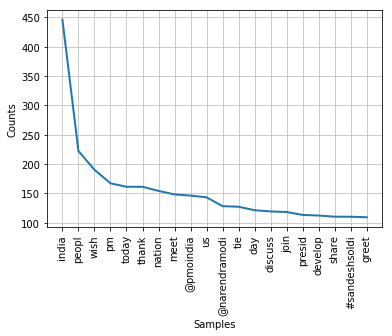

In [79]:
bow = nltk.FreqDist(tokens)
bow.plot(20)

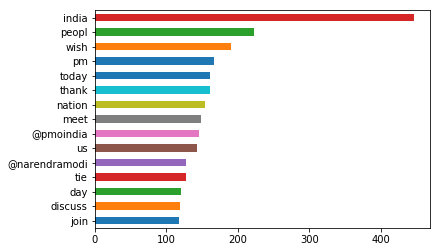

In [18]:
pd.Series(tokens).value_counts().head(15)[::-1].plot.barh()

In [13]:
pd.Series(tokens).value_counts().to_csv('words_list.csv') #use these word list and freqs to make a word cloud

### Problems with Stemmer

In [14]:
print(stemmer.stem('working'))
print(stemmer.stem('organization')) #this is wrong - creates problems in our analysis


work
organ


### We can also use lemmatizer for identification of root word

In [15]:
#similar problem with lemmatizer - not an ideal technique to be used in analysis

from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
print(lemma.lemmatize(word = 'working'))
print(lemma.lemmatize(word = 'organization'))

working
organization


## Important Pointers - text mining specific

In [16]:
docs.str.replace(r'[a-z]','')[0] #regular expression works only on a series. this command removes all letters from a to z

docs.str.replace(r'[^a-z #@]','')[0] # ^ is used as not operator - mention everything that we want to retain in the text 
#by mentioning it after ^ symbol

##: # and @ symbol is retained in twitter data to keep sense and any hashtags/people names in the text 


'the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia'

# Feature Extraction in Text Mining

#### algorithms cas understand numbers, matrices and vectors rather than words directly. We need to convert unstructured data to 
##### structured form. This conversion process is known as feature extraction

## Step: Creating Corpus using sklearn

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
corpus_sklearn = []
tokens = []

for doc in docs:
    words = doc.split(' ') #preferred way
    words_clean = [stemmer.stem(words) for words in words if words not in total_stop_words]
    #doc_clean = ' '.join(words_clean)
    #print(words_clean)
    corpus_sklearn.append(' '.join(words_clean))
    
    #tokens.extend(words_clean)
print(corpus_sklearn)

['presid address wonder encapsul india strength aspir potenti effort toward #transformingindia', 'rashtrapati ji address hous parliament indepth extens hear httpstcordkqtjgnnx @rashtrapatibhvn', '@pmoindia empow marginalis httpstcowwsqgwdk', '@pmoindia commit welfar farmer httpstcopaafrfmrc', '@pmoindia improv qualiti life poor httpstcougmvkz', '@pmoindia financi inclus poverti allevi httpstcoxtzyhht', '@rashtrapatibhvn fourdecad old demand onerankonepens orop arm forc veteran fulfil #presidentmu', '@rashtrapatibhvn govern taken bold decis interest poor #presidentmukherje', '@rashtrapatibhvn proactiv act east polici govt focuss reduc isol eastern region northeast', '@rashtrapatibhvn standup india initi govt plan empow two half lakh sc st women entrepreneur #pr', '@rashtrapatibhvn pradhan mantri fasal bima yojana expand ambit riskcoverag doubl sum insur facilit lowestev premiu', '@rashtrapatibhvn govern taken variou step transform live farmer #presidentmukherje', '@rashtrapatibhvn gover

## Conversion to DTM

In [86]:
dtm_model = CountVectorizer() #converts tokens in corpus to single unique words
dtm = dtm_model.fit_transform(corpus_sklearn)
dtm.toarray()
#en(dtm.toarray()[0])
dtm_model.get_feature_names()[:5]

['aabhar', 'aadhaar', 'aadhar', 'aajtak', 'aamirkhan']

### Feature Extraction - getting freq of different words

In [50]:
df_dtm = pd.DataFrame(dtm.toarray(), columns= dtm_model.get_feature_names())
print(df_dtm.head())
df_dtm.sum().sort_values(ascending = False).head(10) #col sum = gives freq of each col/term

   aabhar  aadhaar  aadhar  aajtak  aamirkhan  aanandmayi  aap  aawa  \
0       0        0       0       0          0           0    0     0   
1       0        0       0       0          0           0    0     0   
2       0        0       0       0          0           0    0     0   
3       0        0       0       0          0           0    0     0   
4       0        0       0       0          0           0    0     0   

   aazadisa  abdel  ...   yuvstrong  zaidi  zay  zeal  zero  zhejiang  ziara  \
0         0      0  ...           0      0    0     0     0         0      0   
1         0      0  ...           0      0    0     0     0         0      0   
2         0      0  ...           0      0    0     0     0         0      0   
3         0      0  ...           0      0    0     0     0         0      0   
4         0      0  ...           0      0    0     0     0         0      0   

   zimbabw  zone  zuma  
0        0     0     0  
1        0     0     0  
2        0 

india       448
peopl       222
wish        190
pm          170
today       162
thank       161
nation      154
meet        148
pmoindia    147
us          144
dtype: int64

In [130]:
print('length of first doc/tweet is: ' + str(len(corpus_sklearn[0].split(' '))))

df_dtm.sum(axis=1).head(10) #row sum = gives length of each doc/tweet

length of first doc/tweet is: 11


0    11
1    10
2     4
3     5
4     6
5     6
6    11
7     8
8    12
9    15
dtype: int64

In [134]:
top_words = df_dtm.sum().sort_values(ascending = False).head(20).index #col sum = gives freq of each col/term
print(top_words)

Index(['india', 'peopl', 'wish', 'pm', 'today', 'thank', 'nation', 'meet',
       'pmoindia', 'us', 'narendramodi', 'tie', 'day', 'discuss', 'join',
       'sandeshsoldi', 'presid', 'develop', 'share', 'greet'],
      dtype='object')


In [136]:
df_top_words = df_dtm[top_words]
df_top_words.head()

,india,peopl,wish,pm,today,thank,nation,meet,pmoindia,us,narendramodi,tie,day,discuss,join,sandeshsoldi,presid,develop,share,greet
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


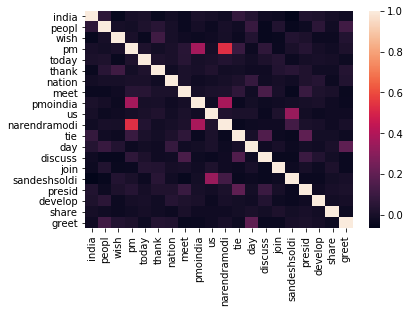

In [139]:
import seaborn
seaborn.heatmap(df_top_words.corr())

# Amazon Reviews

In [88]:
reviews = pd.read_csv('amazon_reviews.csv')

docs = reviews['reviewText'].fillna('empty').str.lower()
docs = docs.str.replace(r'[^a-z #@]', '')

common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['', 'use', 'one', 'like', 'get', 
                    'would', 'bn','want']
stop_words = np.hstack([common_stop_words, custom_stop_words])

corpus_gensim = []
corpus_sklearn = []
tokens = []
stemmer = PorterStemmer()
for doc in docs:
    #print(nltk.word_tokenize(doc))
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stop_words]
    corpus_gensim.append(words_clean)
    tokens.extend(words_clean)
    corpus_sklearn.append(' '.join(words_clean))


dtm_model = CountVectorizer()
dtm = dtm_model.fit_transform(corpus_sklearn)
df_dtm = pd.DataFrame(dtm.toarray(),
                      columns=dtm_model.get_feature_names())

top_words = df_dtm.sum().sort_values(ascending=False).head(20).index
df_top_words = df_dtm[top_words]
df_top_words.head(1)
print(df_dtm.shape)


#sentiment analysis - we will need to use to bigrams or trigrams to understand combination of negative terms and products
#combinations are made sequentially - "The customer service is good"
#'The customer', 'customer service', 'service is', 'is good'

bigram_model = CountVectorizer(ngram_range= (2,2))
dtm_bigrams = bigram_model.fit_transform(corpus_sklearn)
df_dtm_bigram = pd.DataFrame(dtm_bigrams.toarray(),
                      columns=bigram_model.get_feature_names())
df_dtm_bigram.shape

(999, 7183)


(999, 52969)

In [197]:
df_dtm_bigram.head()

,aaa batteri,aac soundtrack,abandon normal,abil add,abil awar,abil book,abil borrow,abil box,abil buy,abil chang,...,zoom menu,zoom move,zoom pinchzoom,zoom rotat,zoom scroll,zoom text,zoom touch,zoom type,zune ive,zune place
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Understanding Consumer Concerns / Top Bigrams

In [200]:
df_dtm_bigram.sum().sort_values(ascending = False).head(10)

barn nobl       156
nook color      128
batteri life     87
touch screen     86
work great       84
sd card          82
read book        80
nook hd          76
work well        68
nook tablet      63
dtype: int64

In [92]:
negative_words = ['not', 'bad', 'worse', 'shit', 'worst', 'suck', 'damag']
good_words = ['good', 'nice', 'quick', 'effici', 'quality']

neg_bigrams = []
pos_bigrams = []

for bigrams in df_dtm_bigram.columns:
    words = bigrams.split(' ')
    if len(np.intersect1d(words,negative_words))>0:
        neg_bigrams.append(bigrams)
    if len(np.intersect1d(words,good_words))>0:
        pos_bigrams.append(bigrams)

#print(neg_bigrams)
print(len(neg_bigrams))
#print(len(pos_bigrams))
#print(neg_bigrams)

159


In [93]:
print(df_dtm_bigram[neg_bigrams].sum().sort_values(ascending = False).head())

#print(df_dtm_bigram[pos_bigrams].sum().sort_values(ascending = False).head())

isnt bad      5
bad review    4
go bad        4
bad thing     3
bad realli    3
dtype: int64


# Sentiment Analysis - Unsupervised

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3-\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [97]:
sentiment_model = SentimentIntensityAnalyzer()
scores = []

for i in reviews['reviewText'].fillna(''):
    score = sentiment_model.polarity_scores(i)['compound']
    scores.append(score)

print(scores)

[0.9882, 0.4359, 0.9858, -0.2307, -0.7845, 0.5719, -0.5256, 0.9146, 0.9209, 0.9636, 0.6369, 0.8687, -0.1779, 0.8151, 0.9329, -0.0814, -0.0516, 0.2223, 0.6249, 0.9022, 0.9022, -0.079, 0.4215, 0.7906, 0.3804, 0.9568, 0.9483, 0.8718, 0.9493, 0.855, -0.8332, 0.8422, 0.7783, 0.9635, 0.9201, -0.2277, 0.4404, 0.25, 0.5574, 0.9711, 0.9551, 0.8979, 0.5859, 0.4128, 0.9256, 0.4404, 0.9711, 0.8885, 0.7178, 0.1406, 0.8976, 0.3716, 0.7906, 0.8807, 0.0, 0.8271, 0.705, 0.9418, 0.8261, 0.8804, 0.7884, 0.4404, -0.0366, -0.4588, 0.8591, 0.8885, -0.8268, 0.4672, 0.0291, 0.9889, -0.3187, 0.1901, 0.4404, -0.0772, 0.9751, 0.5594, 0.2732, 0.6028, 0.7357, 0.9041, 0.9582, -0.0516, 0.3691, 0.9117, 0.7506, 0.9481, 0.6124, 0.1513, 0.9601, 0.5719, 0.4153, 0.7783, -0.1655, 0.8625, 0.9162, 0.0, 0.9335, 0.8531, -0.0772, 0.7351, -0.1007, 0.9482, 0.9514, 0.0, 0.969, -0.5994, 0.6361, 0.2023, 0.9136, 0.2755, 0.9151, 0.8865, 0.9392, 0.8779, -0.1045, 0.8388, 0.9061, -0.4495, -0.2244, 0.1027, 0.7579, 0.8608, 0.9559, 0.34, 0.

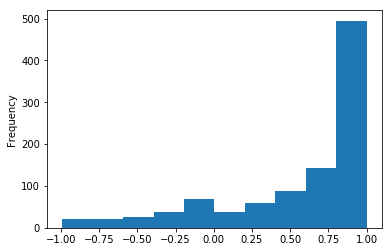

In [101]:
reviews['score'] = scores
reviews['score'].plot.hist()

In [103]:
def assign_sentiment(score):
    if score >= 0.5:
        return 'very good'
    elif score > 0.2 and score < 0.5:
        return 'good'
    elif score > -0.2 and score < 0.2:
        return 'neutral'
    else:
        return 'bad'
    
reviews['sentiment'] = reviews['score'].apply(assign_sentiment)
reviews[['score','sentiment']].head()

,score,sentiment
0,0.9882,very good
1,0.4359,good
2,0.9858,very good
3,-0.2307,bad
4,-0.7845,bad


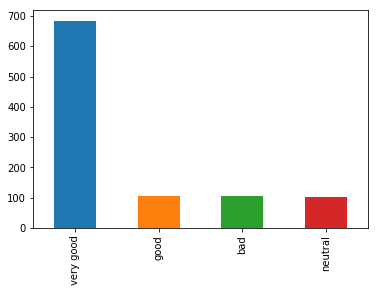

In [239]:
reviews['sentiment'].value_counts().plot.bar()

In [247]:
reviews['date'] = pd.to_datetime(reviews['reviewTime'])
reviews.index = reviews['date']
#plot sentiment trend across time periods

## Supervised Learning

In [64]:
hotstar = pd.read_csv('hotstar.allreviews_Sentiments.csv')
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [23]:
docs = hotstar['Reviews'].fillna('empty').str.lower()
docs = docs.str.replace(r'[^a-z #@]', '')

common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['', 'hotstartweet', 'hotstar', 'use', 'rt', 
                    'thi', 'use','amp','u']
stop_words = np.hstack([common_stop_words, custom_stop_words])

corpus_gensim = []
corpus_sklearn = []
tokens = []
stemmer = PorterStemmer()
for doc in docs:
    #print(nltk.word_tokenize(doc))
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stop_words]
    corpus_gensim.append(words_clean)
    tokens.extend(words_clean)
    corpus_sklearn.append(' '.join(words_clean))

dtm_model = CountVectorizer()
dtm = dtm_model.fit_transform(corpus_sklearn)
df_dtm = pd.DataFrame(dtm.toarray(),
                      columns=dtm_model.get_feature_names())

print(df_dtm.shape)

top_words = df_dtm.sum().sort_values(ascending=False).head(20).index
df_top_words = df_dtm[top_words]
df_top_words.head(1)


#sentiment analysis - we will need to use to bigrams or trigrams to understand combination of negative terms and products
#combinations are made sequentially - "The customer service is good"
#'The customer', 'customer service', 'service is', 'is good'


(5053, 6150)


,hotstartweet,app,watch,episod,good,starplu,show,like,time,hotstarhelp,work,download,tv,video,leak,nice,premium,live,love,got
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity,empty
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral,False
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral,False
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative,False
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive,False
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral,False


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df_top_words

train, test = train_test_split(df_dtm, test_size = 0.3, random_state = 0)

train_y = hotstar.loc[train.index]['Sentiment_Manual']
test_y = hotstar.loc[test.index]['Sentiment_Manual']

model_nb = GaussianNB()
model_nb.fit(train,train_y)
predictions = model_nb.predict(test)
a = confusion_matrix(test_y, predictions)
a

array([[227,  46, 197],
       [ 91, 298, 142],
       [ 55,  40, 420]], dtype=int64)

In [25]:
print('accuracy is: '+ str((a[0][0]+a[1][1]+a[2][2])/test.shape[0]))

accuracy is: 0.6233509234828496


In [291]:
pd.DataFrame(model_nb.predict_proba(test)).head(10)

,0,1,2
0,2.278286e-02,8.196409e-01,0.157576
1,8.741198e-01,1.027238e-01,0.023156
2,1.759190e-09,2.112622e-14,1.000000
3,1.046895e-02,9.893128e-01,0.000218
4,2.055232e-16,1.447710e-09,1.000000
5,3.279520e-02,9.353009e-01,0.031904
6,9.727611e-01,7.951286e-07,0.027238
7,3.279520e-02,9.353009e-01,0.031904
8,9.987471e-01,4.221715e-05,0.001211
9,4.034315e-02,9.051093e-01,0.054548


## Synonyms or similar words for a given word

In [159]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = pd.DataFrame(cosine_similarity(df_top_words.transpose()), 
                             columns = df_top_words.columns, 
                             index = df_top_words.columns)

cosine_matrix.head()

,nook,book,read,work,kindl,screen,use,great,tablet,tv,mount,devic,good,time,also,need,buy,well,app,price
nook,1.000000,0.700421,0.630654,0.367065,0.675523,0.567063,0.468347,0.421243,0.415953,0.038395,0.001035,0.392297,0.355218,0.514347,0.600857,0.369904,0.493827,0.468646,0.394438,0.296691
book,0.700421,1.000000,0.711134,0.348448,0.538097,0.548344,0.486089,0.351694,0.292788,0.024621,0.002604,0.522555,0.387280,0.579883,0.509902,0.324650,0.594478,0.434358,0.293318,0.311341
read,0.630654,0.711134,1.000000,0.314601,0.546357,0.607031,0.503976,0.401143,0.344394,0.021765,0.013558,0.534382,0.341619,0.469437,0.584909,0.360084,0.469521,0.359135,0.325226,0.266387
work,0.367065,0.348448,0.314601,1.000000,0.245088,0.352099,0.459149,0.422973,0.366142,0.160544,0.099880,0.400279,0.427275,0.396500,0.338064,0.429756,0.354600,0.494926,0.368391,0.362619
kindl,0.675523,0.538097,0.546357,0.245088,1.000000,0.528465,0.432503,0.261846,0.196414,0.013922,0.000776,0.337346,0.267745,0.376435,0.431035,0.289189,0.440361,0.285104,0.245448,0.230266


In [151]:
# different from cosine similarity

from scipy.spatial.distance import cosine
1 - cosine([1,2,3],[-1,-2,-3])

-1.0

In [167]:
series = cosine_matrix['nook'].sort_values(ascending = False)
series = series[series.index != 'nook']
series.head()

book      0.700421
kindl     0.675523
read      0.630654
also      0.600857
screen    0.567063
Name: nook, dtype: float64

In [169]:
def similar_words(cosine_matrix, word, top):
    series = cosine_matrix[word].sort_values(ascending = False)
    series = series[series.index != word]
    return series.head(top)
    

In [174]:
cosine_matrix = pd.DataFrame(cosine_similarity(df_dtm.transpose()), 
                             columns = df_dtm.columns, 
                             index = df_dtm.columns)

similar_words(cosine_matrix, 'kindl', 10)

nook      0.675523
touch     0.549399
amazon    0.546405
read      0.546357
book      0.538097
screen    0.528465
epub      0.496809
turn      0.469812
better    0.459308
day       0.456683
Name: kindl, dtype: float64

In [181]:
df_dtm.iloc[0] #vector representation of a doc (tweet/review)

df_dtm.apply(lambda x : x.sum(), axis = 1).sort_values(ascending = False).head()

387    1015
273     941
563     713
552     684
248     658
dtype: int64

## Document Similarity

In [190]:
cosine_matrix_docs = pd.DataFrame(cosine_similarity(df_dtm), columns= df_dtm.index,
                                 index = df_dtm.index)

cosine_matrix_docs.head()

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,1.000000,0.128410,0.272401,0.219190,0.201925,0.090289,0.083592,0.013135,0.066203,0.187546,...,0.000000,0.150482,0.091003,0.104257,0.147442,0.000000,0.020447,0.116563,0.151717,0.058977
1,0.128410,1.000000,0.345712,0.282485,0.323744,0.000000,0.013167,0.062070,0.018771,0.051697,...,0.014854,0.071110,0.010751,0.073900,0.006967,0.011612,0.019324,0.044065,0.000000,0.006967
2,0.272401,0.345712,1.000000,0.447059,0.459570,0.021550,0.013301,0.018810,0.031602,0.050358,...,0.037513,0.028733,0.016290,0.033178,0.045748,0.023461,0.034161,0.011128,0.018106,0.031672
3,0.219190,0.282485,0.447059,1.000000,0.284242,0.013793,0.000000,0.048160,0.060683,0.068047,...,0.028814,0.055174,0.031281,0.095564,0.087846,0.022525,0.028112,0.032053,0.034766,0.027029
4,0.201925,0.323744,0.459570,0.284242,1.000000,0.000000,0.000000,0.017430,0.008785,0.057031,...,0.020856,0.000000,0.015094,0.023057,0.019565,0.016304,0.027131,0.015467,0.016777,0.029347


In [194]:
cosine_matrix_docs[0].sort_values(ascending = False).head()

0      1.000000
187    0.323029
2      0.272401
691    0.260643
640    0.260242
Name: 0, dtype: float64

## Term Frequency - Inverse Document Frequency (TF-IDF)

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

docs = hotstar['Reviews'].fillna('empty').str.lower()
docs = docs.str.replace(r'[^a-z #@]', '')

common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['', 'hotstartweet', 'hotstar', 'use', 'rt', 
                    'thi', 'use','amp','u']
stop_words = np.hstack([common_stop_words, custom_stop_words])

corpus_gensim = []
corpus_sklearn = []
tokens = []
stemmer = PorterStemmer()
for doc in docs:
    #print(nltk.word_tokenize(doc))
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stop_words]
    corpus_gensim.append(words_clean)
    tokens.extend(words_clean)
    corpus_sklearn.append(' '.join(words_clean))

#dtm_model = CountVectorizer()
dtm_model = TfidfVectorizer()
dtm = dtm_model.fit_transform(corpus_sklearn)
df_dtm = pd.DataFrame(dtm.toarray(),
                      columns=dtm_model.get_feature_names())

print(df_dtm.shape)

top_words = df_dtm.sum().sort_values(ascending=False).head(20).index
df_top_words = df_dtm[top_words]
df_top_words.head(1)


#sentiment analysis - we will need to use to bigrams or trigrams to understand combination of negative terms and products
#combinations are made sequentially - "The customer service is good"
#'The customer', 'customer service', 'service is', 'is good'



df_top_words

train, test = train_test_split(df_dtm, test_size = 0.3, random_state = 0)

train_y = hotstar.loc[train.index]['Sentiment_Manual']
test_y = hotstar.loc[test.index]['Sentiment_Manual']

model_nb = RandomForestClassifier()
model_nb.fit(train,train_y)
predictions = model_nb.predict(test)
a = confusion_matrix(test_y, predictions)
a
print('accuracy is: ' + str((a[0][0]+a[1][1]+a[2][2])/test.shape[0]))

(5053, 6150)
accuracy is: 0.746042216358839


In [46]:
print('accuracy is: ' + str((a[0][0]+a[1][1]+a[2][2])/test.shape[0]))

accuracy is: 0.746042216358839


## Principal Component Analysis

In [31]:
from sklearn.decomposition import PCA

In [38]:
model_pca = PCA(n_components=20)
df_pca = pd.DataFrame(model_pca.fit_transform(df_dtm))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.045791,-0.013011,0.006621,0.007642,-0.029983,0.001775,-0.021440,0.013309,0.018361,-0.000752,-0.005059,-0.036156,0.002243,-0.023685,-0.005746,0.004095,-0.021640,-0.023279,-0.002578,-0.001625
1,-0.045385,-0.012849,0.006514,0.007490,-0.029329,0.001734,-0.020871,0.012935,0.017824,-0.000727,-0.004897,-0.034901,0.002161,-0.022792,-0.005513,0.003923,-0.020722,-0.022247,-0.002456,-0.001556
2,-0.056313,-0.016129,0.010871,-0.002338,-0.055301,0.001680,-0.050803,0.014658,-0.026050,-0.014554,0.017270,-0.018384,0.052670,-0.017529,-0.024831,0.031575,-0.040521,-0.030395,-0.003524,-0.076926
3,-0.071959,-0.013340,0.007795,-0.028682,0.096254,0.093462,-0.064399,0.020644,-0.056424,0.005422,-0.125203,0.087277,-0.003500,0.046925,-0.055566,0.246236,0.015278,0.088587,0.025387,0.037093
4,-0.093777,-0.040387,0.005100,-0.040673,0.160438,-0.095639,0.032805,-0.047910,-0.047396,-0.003723,-0.007380,0.018181,-0.034201,-0.012462,-0.007003,-0.007228,0.018044,0.035079,-0.021498,-0.032251


## Variance Curve

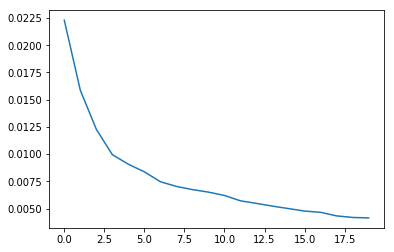

In [39]:
df_pca.var().plot.line()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:

train, test = train_test_split(df_pca, test_size = 0.3, random_state = 0)

train_y = hotstar.loc[train.index]['Sentiment_Manual']
test_y = hotstar.loc[test.index]['Sentiment_Manual']

model_nb = RandomForestClassifier()
model_nb.fit(train,train_y)
predictions = model_nb.predict(test)
a = confusion_matrix(test_y, predictions)
a
print('accuracy is: ' + str((a[0][0]+a[1][1]+a[2][2])/test.shape[0]))

accuracy is: 0.7077836411609498


## Generating Corpus using Gensim - used in Topic Modelling and Summarization

### Step 1: Text Cleaning and creating corpus

In [107]:
reviews = pd.read_csv('amazon_reviews.csv')


docs = reviews['reviewText'].fillna('empty').str.lower()
docs = docs.str.replace(r'[^a-z ]', '')

common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = []
stop_words = np.hstack([common_stop_words, custom_stop_words])

corpus_gensim = []
tokens = []
for doc in docs:
    #print(nltk.word_tokenize(doc))
    words = doc.split(' ')
    words_clean = [word for word in words if word not in stop_words]
    corpus_gensim.append(words_clean)
    tokens.extend(words_clean)


In [117]:
reviews['reviewText'][1]

'I\'m a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connect it to my laptop and install the software and then attempt to update it.  The software detected a problem with my update and wanted my home address so I could be sent a patch on an SD card.  Hello?  I don\'t think I\'m all that unusual; my home address is a PO box that a friend checks weekly and that I might get to check every six months or so.  I live in my truck and at truck stops.  If you need to make a patch available on an SD card then you should send the SD cards to the truck stops where the devices are sold.  I ran the update program multiple times until the program said that the TND 700 was completely updated.I programmed in the height (13\'6"), the length (53\') and the weight (80,000#) of my rig and told it that I preferred highways.  I was parked at a truck stop in the Cincinnati OH area. 

### Step 2: Create Token ID

In [69]:
!pip install gensim


In [109]:
import gensim
dictionary = gensim.corpora.Dictionary(corpus_gensim)
#print(dictionary) #dictionary includes unique words from the corpus - all the words that appear
dict(dictionary) #dictionary of unique words


{0: '',
 1: 'addresses',
 2: 'around',
 3: 'arrived',
 4: 'back',
 5: 'bad',
 6: 'big',
 7: 'bigger',
 8: 'coming',
 9: 'contacted',
 10: 'could',
 11: 'days',
 12: 'earlier',
 13: 'ease',
 14: 'ect',
 15: 'email',
 16: 'exception',
 17: 'exchange',
 18: 'expected',
 19: 'freezing',
 20: 'glitch',
 21: 'got',
 22: 'gps',
 23: 'great',
 24: 'however',
 25: 'husband',
 26: 'impressed',
 27: 'instructions',
 28: 'love',
 29: 'luck',
 30: 'memory',
 31: 'million',
 32: 'minutes',
 33: 'normal',
 34: 'nothing',
 35: 'one',
 36: 'option',
 37: 'otr',
 38: 'person',
 39: 'probably',
 40: 'putting',
 41: 'really',
 42: 'received',
 43: 'road',
 44: 'routes',
 45: 'say',
 46: 'scale',
 47: 'screen',
 48: 'seller',
 49: 'shipping',
 50: 'started',
 51: 'tells',
 52: 'thats',
 53: 'time',
 54: 'truck',
 55: 'trucker',
 56: 'unit',
 57: 'use',
 58: 'way',
 59: 'week',
 60: 'well',
 61: 'within',
 62: 'work',
 63: 'worked',
 64: 'across',
 65: 'address',
 66: 'advised',
 67: 'almost',
 68: 'another

In [116]:
dictionary.doc2bow(corpus_gensim[0]) #gives freq of each unique word from the above dictionary in the first doc - done at a doc
#level

create_doc2bow = lambda doc : dictionary.doc2bow(doc)
comp_corpus_gensim = [create_doc2bow(doc) for doc in corpus_gensim]
comp_corpus_gensim

[[(0, 8),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2)],
 [(0, 31),
  (10, 1),
  (21, 1),
  (22, 1),
  (24, 1),
  (32, 1),
  (37, 1),
  (53, 2),
  (54, 7),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1

In [73]:
#tfidf = gensim.models.TfidfModel(comp_corpus_gensim)

lda = gensim.models.LdaModel(comp_corpus_gensim,id2word=dictionary, num_topics=5)

lda.print_topics() #gives prob of each word under different topics - default only 10 words are shown

[(0,
  '0.035*"" + 0.014*"nook" + 0.007*"books" + 0.006*"get" + 0.006*"bn" + 0.005*"like" + 0.005*"kindle" + 0.005*"screen" + 0.005*"one" + 0.005*"would"'),
 (1,
  '0.045*"" + 0.017*"nook" + 0.009*"kindle" + 0.008*"books" + 0.007*"use" + 0.007*"one" + 0.007*"screen" + 0.007*"read" + 0.005*"tablet" + 0.005*"great"'),
 (2,
  '0.063*"" + 0.023*"nook" + 0.007*"one" + 0.006*"kindle" + 0.006*"books" + 0.006*"like" + 0.005*"great" + 0.005*"price" + 0.005*"read" + 0.005*"screen"'),
 (3,
  '0.068*"" + 0.015*"nook" + 0.008*"one" + 0.007*"tv" + 0.006*"books" + 0.006*"kindle" + 0.006*"great" + 0.005*"like" + 0.005*"screen" + 0.005*"would"'),
 (4,
  '0.048*"" + 0.014*"nook" + 0.007*"books" + 0.006*"like" + 0.006*"device" + 0.005*"screen" + 0.005*"read" + 0.005*"kindle" + 0.005*"use" + 0.005*"im"')]

In [79]:
print(comp_corpus_gensim[1])
print(dict(dictionary))

[(0, 31), (10, 1), (21, 1), (22, 1), (24, 1), (32, 1), (37, 1), (53, 2), (54, 7), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 3), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 2), (120, 1), (121, 1), (122, 2), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 1), (130, 1), (131, 1), (132, 2), (133, 1), (134, 1), (135, 2), (136, 1), (137, 1), (138, 1), (139, 2), (140, 1), (141, 1), (142, 2), (143, 1), (144, 1), (145, 1), (146, 1), (147, 2), (148, 1), (149, 2), (150, 1), (151, 4), (152, 1), (153, 1), (154, 1), (155, 1), (156, 1), (157, 1), (158, 1), (159

In [84]:
# same code as above - all collated in one cell
reviews = pd.read_csv('amazon_reviews.csv')


docs = reviews['reviewText'].fillna('empty').str.lower()
docs = docs.str.replace(r'[^a-z ]', '')

common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['nook','','would','use', 'book','kindle','one','dont', 'like','screen','bn']
stop_words = np.hstack([common_stop_words, custom_stop_words])

corpus_gensim = []
tokens = []
for doc in docs:
    #print(nltk.word_tokenize(doc))
    words = doc.split(' ')
    words_clean = [word for word in words if word not in stop_words]
    corpus_gensim.append(words_clean)
    tokens.extend(words_clean)

    
import gensim
dictionary = gensim.corpora.Dictionary(corpus_gensim)
print(dictionary) #dictionary includes unique words from the corpus - all the words that appear
dict(dictionary) #list of unique words

dictionary.doc2bow(corpus_gensim[0]) #gives freq of each unique word from the above dictionary in the first doc - done at a doc
#level

create_doc2bow = lambda doc : dictionary.doc2bow(doc)
comp_corpus_gensim = [create_doc2bow(doc) for doc in corpus_gensim]
comp_corpus_gensim[:1] #first doc 

#tfidf = gensim.models.TfidfModel(comp_corpus_gensim)

lda = gensim.models.LdaModel(comp_corpus_gensim,id2word=dictionary, num_topics=5)

lda.print_topics() #gives prob of each word under different topics - default only 10 words are shown

Dictionary(9444 unique tokens: ['addresses', 'around', 'arrived', 'back', 'bad']...)


[(0,
  '0.009*"books" + 0.006*"read" + 0.006*"tablet" + 0.005*"device" + 0.005*"good" + 0.005*"much" + 0.005*"get" + 0.004*"also" + 0.004*"great" + 0.004*"bought"'),
 (1,
  '0.007*"books" + 0.007*"mount" + 0.007*"great" + 0.007*"read" + 0.006*"tv" + 0.006*"good" + 0.005*"device" + 0.004*"reading" + 0.004*"android" + 0.004*"also"'),
 (2,
  '0.008*"books" + 0.006*"get" + 0.006*"card" + 0.005*"cable" + 0.005*"mount" + 0.004*"read" + 0.004*"device" + 0.004*"tv" + 0.004*"could" + 0.004*"well"'),
 (3,
  '0.010*"books" + 0.007*"read" + 0.006*"tv" + 0.006*"great" + 0.006*"get" + 0.005*"im" + 0.005*"tablet" + 0.004*"well" + 0.004*"time" + 0.004*"easy"'),
 (4,
  '0.007*"great" + 0.006*"tv" + 0.006*"tablet" + 0.006*"bought" + 0.005*"get" + 0.005*"books" + 0.005*"good" + 0.005*"reading" + 0.005*"price" + 0.004*"also"')]

In [98]:
a = lda.get_document_topics(comp_corpus_gensim[1]) #this gives prob of each doc for different topics

pd.DataFrame(a, columns = ['topic','prob']).sort_values(by = 'prob', ascending = False)['topic'].values[0]
#gives us the topic for each doc based on highest prob

2

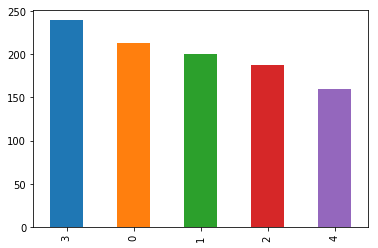

In [103]:
# looping above method through all docs

def get_best_topic(prob1):
    return (pd.DataFrame(prob1, columns = ['topic','prob']).sort_values(by = 'prob', ascending = False)['topic'].values[0])

n = reviews.shape[0]
reviews['topics'] = [get_best_topic(lda.get_document_topics(comp_corpus_gensim[i])) for i in range(n)]
reviews['topics'].value_counts().plot.bar()

In [104]:
from sklearn.cluster import KMeans

In [105]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
pd.Series(model_kmeans.labels_).value_counts()

0    2955
2    1428
4     266
3     228
1     176
dtype: int64

In [116]:
w2t = pd.DataFrame(lda.state.get_lambda(), columns= dict(dictionary).values())
w2t = w2t.apply(lambda x : x/x.sum(), axis = 1)
w2t

,addresses,around,arrived,back,bad,big,bigger,coming,contacted,could,...,itselfanyhow,coil,unnecessarily,lifetime,wearing,fexr,fujifilm,modes,scam,stills
0,0.000033,0.001239,0.000418,0.002158,0.001092,0.001596,0.000278,0.000293,0.000183,0.001655,...,0.000012,0.000070,0.000070,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
1,0.000040,0.000974,0.000164,0.004341,0.000839,0.001074,0.000278,0.000325,0.000025,0.002268,...,0.000013,0.000013,0.000013,0.000077,0.000077,0.000051,0.000045,0.000013,0.000013,0.000013
2,0.000086,0.001497,0.000319,0.002210,0.001001,0.000908,0.000146,0.000185,0.000157,0.004246,...,0.000081,0.000014,0.000014,0.000014,0.000014,0.000036,0.000042,0.000014,0.000014,0.000014
3,0.000044,0.001197,0.000527,0.002911,0.000820,0.001402,0.000229,0.000161,0.000019,0.002076,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000015,0.000015,0.000012,0.000012,0.000012
4,0.000146,0.001201,0.000361,0.002216,0.000502,0.001235,0.000473,0.000359,0.000068,0.002174,...,0.000016,0.000016,0.000016,0.000017,0.000016,0.000016,0.000016,0.000099,0.000099,0.000099


In [122]:
w2t['topic'] = w2t.index

w2t.melt(id_vars='topic')

,topic,variable,value
0,0,addresses,0.000033
1,1,addresses,0.000040
2,2,addresses,0.000086
3,3,addresses,0.000044
4,4,addresses,0.000146
5,0,around,0.001239
6,1,around,0.000974
7,2,around,0.001497
8,3,around,0.001197
9,4,around,0.001201


## Text Summarization

In [ ]:
#abstractive: machine reads entire text and summarizes it in different words
#extractive: Identify important messages in a text and collate them together. works on concept on lexrank (graph based algo)

In [132]:
from gensim.summarization import summarizer

doc = reviews['reviewText'][387]
summarizer.summarize(doc,ratio = 0.05) #word_count=100

'EDIT - Update 1.4.1 (12/21/2011): BIG update rolled out on December 14th, with lots of big changes, most of which really improved the device.First, the "n" key, which originally functioned as a home key taking you back to the original home screen, now functions as the menu key instead, like on the new Nook Tablet.\nReading a book involved zooming in and scrolling down, instead of sideways like the ereader application, and when you closed the PDF file, reopening would take you right back to page one, and never saved your last place.\nIt also scrolls sideways, instead of down, which just makes sense and follows with the overall expectations of the reading experience.Interestingly, enough, they still haven\'t resolved the issue of PDF files not having a cover when on the home screen or in the menu, even when the information is attached, which is something I was hoping they\'d resolve.'

## Word to Vec

In [135]:
model = gensim.models.Word2Vec(corpus_gensim,size = 300)
model.similar_by_word('ipad')

C:\ProgramData\Anaconda3-\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
C:\ProgramData\Anaconda3-\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('way', 0.9999778270721436),
 ('little', 0.9999772310256958),
 ('bought', 0.9999768733978271),
 ('back', 0.9999767541885376),
 ('work', 0.999976396560669),
 ('time', 0.9999763369560242),
 ('hardware', 0.999975860118866),
 ('still', 0.9999758005142212),
 ('thing', 0.9999758005142212),
 ('lot', 0.9999756813049316)]

In [138]:
model.wv['tablet'] #check for cosine similarity between array of 2 different words to understand similarity between them

array([-0.00713544, -0.13269292,  0.18689899, -0.24763867,  0.4463328 ,
       -0.12039756,  0.04290101, -0.24806497, -0.04314964, -0.15163863,
        0.11612546, -0.15164734,  0.2811088 , -0.14473951,  0.24175195,
        0.07509691,  0.26923212,  0.03728502, -0.30727443, -0.15314446,
       -0.00139846,  0.10380006, -0.06455399, -0.03051403, -0.00493666,
       -0.20558153, -0.18015102,  0.09599833, -0.22578344,  0.09073447,
       -0.18909207, -0.1959862 , -0.15378939,  0.04428228,  0.18138656,
       -0.19150443,  0.03520645,  0.3111242 , -0.28923306,  0.19665374,
        0.12031884,  0.11968143,  0.1924596 , -0.08364502, -0.26294672,
       -0.25987658, -0.33550042, -0.2528461 , -0.06465229,  0.03642439,
       -0.09919976,  0.050253  ,  0.13194704,  0.00730156,  0.27642664,
        0.02397999,  0.50065285,  0.24110955, -0.24198975,  0.09221376,
       -0.16530296, -0.34968543,  0.23845996,  0.16613817, -0.2884939 ,
        0.1994043 ,  0.11225054,  0.2549323 ,  0.09463665,  0.02

In [149]:
for word in nltk.pos_tag(nltk.word_tokenize('I am Sahil and work for Fractal Analytics')):
    if word[1]=='NNP':
        print (word[0]) #gives info about part of speech - eg Sahil is noun

Sahil
Fractal
Analytics


## Scrape data from twitter

In [ ]:
# code to be shared by Kathirmani

## Web Scraping

In [161]:
import bs4
import requests

In [159]:
link = 'https://en.wikipedia.org/wiki/Liverpool'

tables = pd.read_html(link)
len(tables)
tables[19].head()

,0,1,2
0,"vteBuildings and structures in Liverpool, England",NaN,NaN
1,Skyscrapers and highrises(over 60m),1 Princes Dock Alexandra Tower Beetham Tower M...,NaN
2,Notable lowrises,Albert Dock Alder Hey Children's Hospital Bank...,NaN
3,Places of worship,All Saints' Church Al-Rahma Mosque Church of A...,NaN
4,Transportation,Liverpool Coach Station Liverpool One bus stat...,NaN


In [164]:
page = requests.get(link)
print(page.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Liverpool - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Liverpool","wgTitle":"Liverpool","wgCurRevisionId":859374987,"wgRevisionId":859374987,"wgArticleId":18081,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: external links","CS1 maint: BOT: original-url status unknown","CS1: Julian–Gregorian uncertainty","All articles with dead external links","Articles with dead external links from June 2016","Webarchive template wayback links","Wikipedia indefinitely semi-protected pages","Wikipedia indefinitely move-protected pages","Use dmy dat

In [174]:
bs = bs4.BeautifulSoup(page.text,'lxml')

#   print(bs.findAll('p')) #prints all paragraphs available

text = []
for p in bs.findAll('p'):
    text.append(p.text)
    
text[1]

'Liverpool (/ˈlɪvərpuːl/) is a city in North West England, with an estimated population of 491,500 in 2017.[5] Its metropolitan area is the fifth-largest in the UK, with a population of 2.24 million in 2011.[6] The local authority is Liverpool City Council, the most populous local government district in the metropolitan county of Merseyside and the largest in the Liverpool City Region.\n'

In [177]:
for img in bs.findAll('img'):
    print(img.get('src'))


//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Padlock-silver.svg/20px-Padlock-silver.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Liverpool-Montage.jpg/250px-Liverpool-Montage.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Coat_of_arms_of_Liverpool_City_Council.png/100px-Coat_of_arms_of_Liverpool_City_Council.png
//upload.wikimedia.org/wikipedia/en/thumb/c/c5/Liverpool_City_Council_Logo.svg/75px-Liverpool_City_Council_Logo.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Liverpool_UK_locator_map.svg/250px-Liverpool_UK_locator_map.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/9/95/North_West_England_districts_2011_map.svg/250px-North_West_England_districts_2011_map.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/6px-Red_pog.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/United_Kingdom_adm_location_map.svg/250px-United_Kingdom_adm_location_map.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/0/0c

## Regular Expressions

In [178]:
import re

In [192]:
sen = 'this is Sahil. Number is +91-7838959153'
pattern = re.compile(r'[a-z]{4,}')

pattern.findall(sen)

['this', 'ahil', 'umber']

In [185]:
[pattern.findall(word) for word in sen.split(' ')]

[['this'], [], ['ahil'], ['umber'], [], []]

In [193]:
pattern = re.compile(r'[0-9]{10,}')
[pattern.findall(word) for word in sen.split(' ')]

[[], [], [], [], [], ['7838959153']]

In [194]:
pattern = re.compile(r'^\+91-[0-9]{10,}')
[pattern.findall(word) for word in sen.split(' ')]

[[], [], [], [], [], ['+91-7838959153']]

In [197]:
pattern = re.compile(r'^[a-zA-Z]')
[pattern.findall(word) for word in sen.split(' ')]

[['this'], ['is'], ['Sahil'], ['Number'], ['is'], []]

In [198]:
pattern = re.compile(r'^[a-zA-Z]+')
[pattern.findall(word) for word in sen.split(' ')]

[['this'], ['is'], ['Sahil'], ['Number'], ['is'], []]

In [199]:
pattern = re.compile(r'^[a-zA-Z].*')
[pattern.findall(word) for word in sen.split(' ')]

[['this'], ['is'], ['Sahil.'], ['Number'], ['is'], []]

In [200]:
pattern = re.compile(r'^[a-zA-Z+].*')
[pattern.findall(word) for word in sen.split(' ')]

[['this'], ['is'], ['Sahil.'], ['Number'], ['is'], ['+91-7838959153']]

In [206]:
sen = 'this is Sahil. Number is abc@gmail.com and sddd@gmail.edu'

pattern = re.compile(r'^[a-zA-Z].*@.*\.[com|edu]+')
[pattern.findall(word) for word in sen.split(' ')]

[[], [], [], [], [], ['abc@gmail.com'], [], ['sddd@gmail.edu']]